In [1]:
import pandas as pd
import random
import numpy as np
import os
import glob
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [3]:
def get_data():
    train_dir = "./data/train/"
    X = []
    y = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            X.append(img)
            y.append(j)
    return X,y

In [4]:
X, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [5]:
#converted images into numpy array
X = np.asarray(X)
y = np.asarray(y)
print(X.shape,y.shape)

(22424, 64, 64, 3) (22424,)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_validate = np.reshape(X_validate, (X_validate.shape[0], -1))
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_validate.shape)

Training data shape:  (17939, 12288)
Validation data shape:  (4485, 12288)


In [106]:
#convert each image into a vector which represented as a row in the matrix X
#X = np.reshape(X, (X.shape[0], -1))

In [107]:
#print(X.shape)

In [108]:
#y=y.reshape((-1,1))

In [109]:
#print(y.shape)

In [110]:
#merge X and y matrix
#X=np.hstack((X,y))

In [111]:
#print(X.shape)

In [112]:
#now shuffle the data points(each data point is a image)
#np.random.shuffle(X)

In [113]:
#now shuffle the data points(each data point is a image)
#np.random.shuffle(X)

In [114]:
#split=int(0.8*X.shape[0])

In [115]:
#X_train=X[:split,:-1]

In [116]:
#print(X_train.shape)

In [117]:
#X_validate=X[split:,:-1]

In [118]:
#print(X_validate.shape)

In [119]:
#y_train=X[:split,-1]

In [120]:
#print(y_train.shape)

In [121]:
#y_validate=X[split:,-1]

In [122]:
#print(y_validate.shape)

In [123]:
#print('Training data shape: ', X_train.shape,y_train.shape)
#print('Validation data shape: ', X_validate.shape,y_validate.shape)

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
X_train = StandardScaler().fit_transform(X_train)

In [126]:
X_validate = StandardScaler().fit_transform(X_validate)

In [127]:
from sklearn.decomposition import PCA
# Make an instance of the Model
#pca = PCA(n_components=2)

In [128]:
#pca.fit(X_train)

In [129]:
#X_train = pca.transform(X_train)
#X_validate = pca.transform(X_validate)

In [130]:
print(X_train.shape,X_validate.shape)

(17939, 12288) (4485, 12288)


In [8]:
classifier = RandomForestClassifier(n_estimators = 50 criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-8-d8148214cdd0>, line 1)

In [ ]:
y_predict = classifier.predict(X_validate)

In [ ]:
#print(y_predict)

In [ ]:
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100

In [ ]:
#print("Training Accuracy of Random Forest",Accuracy(y_train,classifier.predict(X_train)))
print("Validation set Accuracy of Random Forest",Accuracy(y_validate,classifier.predict(X_validate)))

In [139]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_validate,y_predict)

In [140]:
print(cm)

[[456   0   0   1   3   1   0   0   0   2]
 [  2 495   0   0   0   0   0   2   1   0]
 [  0   3 477   0   0   0   0   0   0   0]
 [  3   1   1 483   3   0   0   0   0   0]
 [  6   2   0   5 450   0   1   0   1   1]
 [  1   0   0   0   3 460   0   0   1   1]
 [  1   4   1   0   2   1 447   1   0   0]
 [  0   0   2   1   0   0   3 369   1   1]
 [  7   0   3   1   4   0   0   1 367   7]
 [  5   2   1   1   2   0   1   1   1 381]]


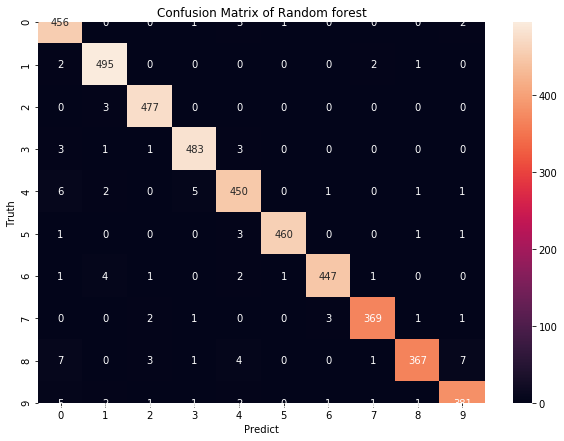

In [141]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Confusion Matrix of Random forest")
sn.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()

In [138]:
from sklearn import metrics
print("Performance Matrix of Random forest")
print(metrics.classification_report(y_validate, y_predict))

Performance Matrix of Random forest
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       463
           1       0.98      0.99      0.98       500
           2       0.98      0.99      0.99       480
           3       0.98      0.98      0.98       491
           4       0.96      0.97      0.96       466
           5       1.00      0.99      0.99       466
           6       0.99      0.98      0.98       457
           7       0.99      0.98      0.98       377
           8       0.99      0.94      0.96       390
           9       0.97      0.96      0.97       395

    accuracy                           0.98      4485
   macro avg       0.98      0.98      0.98      4485
weighted avg       0.98      0.98      0.98      4485

